In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458

In [2]:
fuji_cf4 = pd.read_csv("fuji_pv_vs_cf4_v02.csv")
fuji_cf4

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,eDMcep,DMmas,eDMmas,RA,DE,glon,glat,sgl,sgb,Separation
0,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,NaN,NaN,NaN,184.9135,-0.7508,286.3170,61.0915,114.7696,-8.7127,0.422726
1,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,NaN,NaN,NaN,193.9221,27.2507,40.5545,89.0469,90.1140,7.2664,0.237643
2,39627665157658710,7,67.916169,-5.086177,39627665157658710,950,22746,sv1,bright,39627665157658710,...,NaN,NaN,NaN,67.9161,-5.0861,200.4164,-33.2417,309.3239,-53.2570,0.370191
3,39632940354767051,233,155.787603,32.907518,39632940354767051,764,5322,sv1,bright,39632940354767051,...,NaN,NaN,NaN,155.7876,32.9075,193.5473,57.5539,71.4090,-20.4937,0.060406
4,39633207917808010,75,163.673104,47.451925,39633207917808010,830,5907,sv1,bright,39633207917808010,...,NaN,NaN,NaN,163.6731,47.4520,163.4042,59.4671,62.6001,-7.2851,0.268391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,39633123280945563,1142,247.703678,42.392285,39633123280945563,3340,9984,sv3,bright,39633123280945563,...,NaN,NaN,NaN,247.7037,42.3923,66.8559,43.3064,68.1777,49.2313,0.080219
908,39633006431830890,330,252.120915,36.145967,39633006431830890,3351,9431,sv3,bright,39633006431830890,...,NaN,NaN,NaN,252.1209,36.1460,58.8139,39.5160,74.4267,55.2412,0.126268
909,39627884997904170,645,218.374730,3.905292,39627884997904170,3368,25982,sv3,bright,39627884997904170,...,NaN,NaN,NaN,218.3748,3.9053,353.7764,56.3439,119.4150,24.7435,0.254163
910,39627824616705371,2192,217.650282,1.530603,39627824616705371,3381,25976,sv3,bright,39627824616705371,...,NaN,NaN,NaN,217.6503,1.5306,349.9924,55.0711,121.6968,23.3935,0.066681


In [3]:
fuji_cf4.keys()

Index(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid_1', 'id',
       'healpix', 'survey', 'program', 'targetid.1',
       ...
       'eDMcep', 'DMmas', 'eDMmas', 'RA', 'DE', 'glon', 'glat', 'sgl', 'sgb',
       'Separation'],
      dtype='object', length=146)

In [4]:
fuji_cf4.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid_1',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z_1', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDI

In [5]:
cosmo.luminosity_distance(0.1).value

429.29297760536593

In [6]:
eta_cf4 = -(5.*np.log10(cosmo.luminosity_distance(fuji_cf4.Vcmb/c).value) + 25. - fuji_cf4.DM)/5.
eta_cf4_err = fuji_cf4.eDM/5.
errs = np.sqrt((eta_cf4_err**2)+(fuji_cf4.logdist_err**2)) 

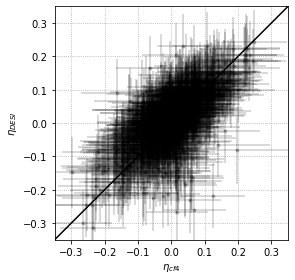

In [7]:
fig, ax = plt.subplots()
ax.set_ylim(-0.35,0.35)
ax.set_xlim(-0.35,0.35)
xxx=[-0.4,0.4];yyy=[-0.4,0.4]
ax.scatter(eta_cf4,fuji_cf4.logdist,color='black',alpha=0.2,edgecolor='none',s=3.5)
ax.errorbar(eta_cf4,fuji_cf4.logdist,xerr=eta_cf4_err,yerr=fuji_cf4.logdist_err,fmt=".k",alpha=0.2)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\eta_{cf4}$')
ax.set_ylabel(r'$\eta_{DESI}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
plt.savefig('fuji_vs_cf4_logdist.png')
plt.savefig('fuji_vs_cf4_logdist.pdf')
plt.show()

In [8]:
print (np.mean(fuji_cf4.logdist-eta_cf4))
print (np.average(fuji_cf4.logdist-eta_cf4,weights=1./errs),"+/-",np.std(fuji_cf4.logdist-eta_cf4)/np.sqrt(len(eta_cf4)))

0.006464675177643288
0.005838243977025892 +/- 0.0022170693403828195


In [18]:
fuji_pv = pd.read_csv("DESI_FP_logdists_fiducial.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,ei,s,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.000279,2.154577,0.004325,-19.925132,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.000122,2.422567,0.002484,-22.520143,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.000486,2.177125,0.004492,-19.991908,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.000241,2.298011,0.001769,-20.724064,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.000123,2.436203,0.002673,-20.874334,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.001198,1.835153,0.035447,-19.362628,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,0.000254,2.113498,0.024009,-20.724069,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,0.000345,2.025392,0.030752,-20.193399,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,0.000850,1.940012,0.035426,-21.045145,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359


In [19]:
fuji_pv["logdist_corr"] = fuji_pv["logdist"] - 0.005838243977025892
fuji_pv["logdist_err_corr"] = np.sqrt(fuji_pv["logdist_err"]**2 + 0.0022170693403828195**2)
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.004325,-19.925132,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.028089,0.095436
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.002484,-22.520143,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.181698,0.095089
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.004492,-19.991908,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.115584,0.095305
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.001769,-20.724064,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.004917,0.099583
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.002673,-20.874334,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.062777,0.095514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.035447,-19.362628,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.019417,0.100794
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,0.024009,-20.724069,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.056752,0.097525
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,0.030752,-20.193399,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.104280,0.099208
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,0.035426,-21.045145,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.299822,0.100246


In [20]:
omega_m = 0.31               # Matter density
deccel = 3.0*omega_m/2.0 - 1.0
czmod = c*fuji_pv["zcmb"].to_numpy()*(1.0 + 0.5*(1.0 - deccel)*(fuji_pv["zcmb"].to_numpy()) - (1.0/6.0)*(2.0 - deccel - 3.0*deccel*deccel)*(fuji_pv["zcmb"].to_numpy())**2)
fuji_pv["pv_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_corr"].to_numpy()
fuji_pv["pverr_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_err_corr"].to_numpy()

In [21]:
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.028089,0.095436,492.592489,1673.636744
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.181698,0.095089,3579.788500,1873.436801
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.115584,0.095305,-2461.913386,2029.990625
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.004917,0.099583,-44.132184,893.706904
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.062777,0.095514,-1060.508710,1613.538643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.019417,0.100794,503.440410,2613.321503
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.056752,0.097525,1595.122901,2741.140025
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.104280,0.099208,2742.224729,2608.841143
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.299822,0.100246,11956.846716,3997.781204


In [22]:
fuji_pv.to_csv('fuji_pv.csv',index=False,header=True)

In [23]:
coma_dist = pd.read_csv("coma_cluster_v02.csv")
coma_dist

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id_1,healpix,survey,program,targetid.1,...,hcearly,dr8objid,dr8specobjid,iddr7,zobs,distcor,flagfc,Separation,GroupID,GroupSize
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.41673,1237667322722975744,2519804194236426240,319492,0.024591,72.389190,0,0.085648,1,200
1,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.93706,1237667323260502016,2522070831048189952,325681,0.023651,72.074554,0,0.025978,1,200
2,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,0.65909,1237667444048396288,2523249238440175616,326812,0.020410,71.005104,0,0.067929,1,200
3,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,0.74740,1237667324334243840,2523234669911107584,325989,0.018675,70.433600,0,0.102168,1,200
4,39628438604091708,1276,194.124215,27.939990,39628438604091708,3319,10400,sv3,bright,39628438604091708,...,0.94470,1237667444048330752,2522145597838878720,326448,0.022131,71.571830,0,0.036010,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,39628443947632625,58,194.557529,28.182528,39628443947632625,3317,10401,sv3,bright,39628443947632625,...,0.14842,1237667324334440448,2522163739780737024,328168,0.023951,72.168030,0,0.083885,1,200
196,39628443951827600,3010,194.857584,28.186981,39628443951827600,3317,10401,sv3,bright,39628443951827600,...,0.93114,1237667324334571776,2523256935021570048,329437,0.025764,72.762790,0,0.076795,1,200
197,39628438620864788,2184,194.986067,27.930032,39628438620864788,3176,10379,sv3,bright,39628438620864788,...,0.07638,1237667444048658944,2522178033431898112,330059,0.025707,72.744550,0,0.087478,1,200
198,39628411743768113,817,194.179984,26.741948,39628411743768113,3421,28127,sv3,bright,39628411743768113,...,0.50000,1237667442437783552,2523201684562274304,326652,0.023175,71.919290,0,0.072157,1,200


In [26]:
coma_dist.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid_1',
       'id_1', 'healpix', 'survey', 'program', 'targetid.1', 'z_1',
       'zerr', 'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_ME

In [45]:
cosmo_2 = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)

In [54]:
dz = cosmo_2.luminosity_distance(coma_dist.z_1).value
#dz
d_coma = 10**(np.log10(dz) - coma_dist.logdist_corr)
print (np.mean(d_coma), "+/-",np.std(d_coma)/np.sqrt(len(d_coma)),"Mpc/h")

81.16104914458715 +/- 1.3681531913194827 Mpc/h
